In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
!pip install textstat
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.2 MB/s eta 0:00:00


In [ ]:
dataset = pd.read_csv('HateSpeechData-1.csv')

# Display first few rows of the dataset
print(dataset.head())

# Preprocess tweets
nltk.download('stopwords')
nltk.download('wordnet')
stopwords_set = set(nltk.corpus.stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Preprocess function
def preprocess(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)  # Remove special characters and numbers
    tweet = tweet.lower()  # Convert to lower case
    return tweet

# Apply preprocessing
dataset['processed_tweets'] = dataset['tweet'].apply(preprocess)

# Remove stopwords and lemmatize
dataset['processed_tweets'] = dataset['processed_tweets'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stopwords_set])
)

# Encode labels
label_encoder = LabelEncoder()
dataset['class'] = label_encoder.fit_transform(dataset['class'])

# Split data
X = dataset['processed_tweets']
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_padded, y_train)

# Predictions and evaluation
y_pred_dt = decision_tree.predict(X_test_padded)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.760137179745814
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.18      0.16       290
           1       0.87      0.86      0.86      3832
           2       0.51      0.49      0.50       835

    accuracy                           0.76      4957
   macro avg       0.51      0.51      0.51      4957
weighted avg       0.76      0.76      0.76      4957



In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train_padded, y_train)

# Predictions and evaluation
y_pred_lr = logistic_regression.predict(X_test_padded)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7760742384506758
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.78      1.00      0.87      3832
           2       0.71      0.03      0.05       835

    accuracy                           0.78      4957
   macro avg       0.50      0.34      0.31      4957
weighted avg       0.72      0.78      0.68      4957



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_padded, y_train)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test_padded)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.7579180956223522
Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.03      0.04       290
           1       0.79      0.95      0.86      3832
           2       0.41      0.11      0.18       835

    accuracy                           0.76      4957
   macro avg       0.43      0.37      0.36      4957
weighted avg       0.68      0.76      0.70      4957



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_padded, y_train)

# Predictions and evaluation
y_pred_rf = random_forest.predict(X_test_padded)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8156142828323583
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.06      0.10       290
           1       0.84      0.96      0.89      3832
           2       0.67      0.42      0.52       835

    accuracy                           0.82      4957
   macro avg       0.61      0.48      0.51      4957
weighted avg       0.78      0.82      0.79      4957



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb = GaussianNB()
# For Naive Bayes, we need to convert the padded sequences to dense arrays (since GaussianNB requires dense input)
X_train_padded_dense = X_train_padded.toarray() if hasattr(X_train_padded, 'toarray') else X_train_padded
X_test_padded_dense = X_test_padded.toarray() if hasattr(X_test_padded, 'toarray') else X_test_padded

nb.fit(X_train_padded_dense, y_train)

# Predictions and evaluation
y_pred_nb = nb.predict(X_test_padded_dense)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.05951180149283841
Classification Report:
               precision    recall  f1-score   support

           0       0.06      1.00      0.11       290
           1       1.00      0.00      0.00      3832
           2       0.14      0.01      0.01       835

    accuracy                           0.06      4957
   macro avg       0.40      0.33      0.04      4957
weighted avg       0.80      0.06      0.01      4957



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['processed_tweets'], y, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Limit to the top 10,000 words
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_length = max(len(seq) for seq in X_train_sequences)  # Find the max length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

In [ ]:

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
496/496 ━━━━━━━━━━━━━━━━━━━━ 27s 45ms/step - accuracy: 0.8368 - loss: 0.4668 - val_accuracy: 0.9541 - val_loss: 0.1392
Epoch 2/15
496/496 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9588 - loss: 0.1130 - val_accuracy: 0.9523 - val_loss: 0.1161
Epoch 3/15
496/496 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9822 - loss: 0.0570 - val_accuracy: 0.9465 - val_loss: 0.1581
Epoch 4/15
496/496 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9886 - loss: 0.0407 - val_accuracy: 0.9493 - val_loss: 0.1624
Epoch 5/15
496/496 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.9929 - loss: 0.0252 - val_accuracy: 0.9435 - val_loss: 0.1829
Epoch 6/15
496/496 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9934 - loss: 0.0219 - val_accuracy: 0.9460 - val_loss: 0.2068
Epoch 7/15
496/496 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9955 - loss: 0.0165 - val_accuracy: 0.9428 - val_loss: 0.2567
Epoch 8/15
496/496 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9956 - loss: 0.0146 - 

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9280 - loss: 0.4498
Test Accuracy: 92.21%


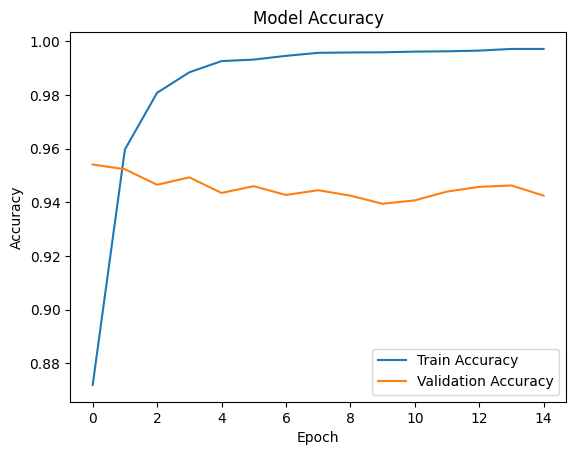

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/4
496/496 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.8326 - loss: 0.4654 - val_accuracy: 0.9503 - val_loss: 0.1244
Epoch 2/4
496/496 ━━━━━━━━━━━━━━━━━━━━ 25s 50ms/step - accuracy: 0.9638 - loss: 0.1052 - val_accuracy: 0.9561 - val_loss: 0.1158
Epoch 3/4
496/496 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9834 - loss: 0.0548 - val_accuracy: 0.9513 - val_loss: 0.1271
Epoch 4/4
496/496 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9908 - loss: 0.0339 - val_accuracy: 0.9496 - val_loss: 0.1788


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9382 - loss: 0.2377
Test Accuracy: 93.40%


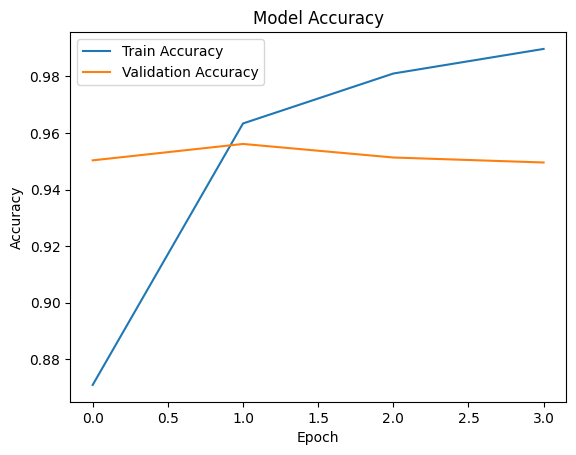

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.8393 - loss: 0.4386 - val_accuracy: 0.9506 - val_loss: 0.1237
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.9643 - loss: 0.0980 - val_accuracy: 0.9501 - val_loss: 0.1225
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9839 - loss: 0.0534 - val_accuracy: 0.9496 - val_loss: 0.1441
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9910 - loss: 0.0290 - val_accuracy: 0.9433 - val_loss: 0.1961
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.9943 - loss: 0.0220 - val_accuracy: 0.9400 - val_loss: 0.2369


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9393 - loss: 0.2654
Test Accuracy: 93.42%


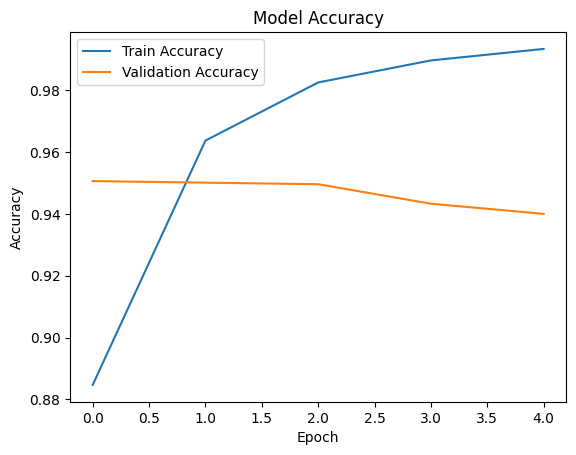

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=6, batch_size=32, validation_split=0.2)

Epoch 1/6
496/496 ━━━━━━━━━━━━━━━━━━━━ 33s 56ms/step - accuracy: 0.8339 - loss: 0.4663 - val_accuracy: 0.9463 - val_loss: 0.1351
Epoch 2/6
496/496 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.9613 - loss: 0.1117 - val_accuracy: 0.9511 - val_loss: 0.1182
Epoch 3/6
496/496 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.9812 - loss: 0.0589 - val_accuracy: 0.9463 - val_loss: 0.1748
Epoch 4/6
496/496 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9896 - loss: 0.0387 - val_accuracy: 0.9468 - val_loss: 0.1607
Epoch 5/6
496/496 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9923 - loss: 0.0310 - val_accuracy: 0.9428 - val_loss: 0.2188
Epoch 6/6
496/496 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.9940 - loss: 0.0234 - val_accuracy: 0.9407 - val_loss: 0.2473


155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9369 - loss: 0.2838
Test Accuracy: 93.48%


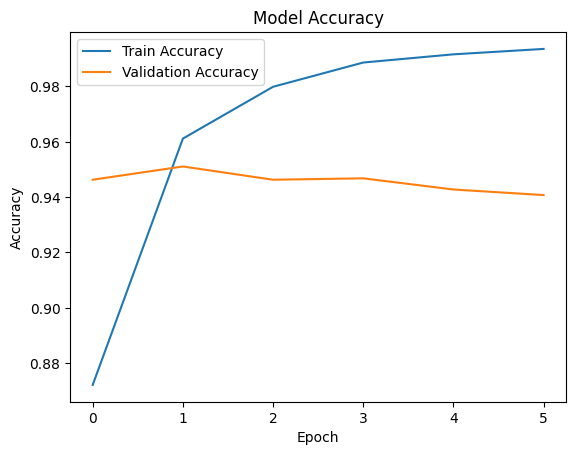

In [ ]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
print(label_encoder.classes_)  # This should print the class names
print(type(label_encoder.classes_))  # This should show the type of the classes


[0 1 2]
<class 'numpy.ndarray'>


In [ ]:
# Define class names manually
class_names = ['Hate', 'Offensive', 'Neither']

# Make predictions
y_preds = model.predict(X_test_padded)
y_preds_classes = np.argmax(y_preds, axis=1)

# Evaluate the model
print(classification_report(y_test, y_preds_classes, target_names=class_names))
accuracy = accuracy_score(y_test, y_preds_classes)
print(f"Accuracy: {accuracy:.2f}")

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
              precision    recall  f1-score   support

        Hate       0.34      0.29      0.31       290
   Offensive       0.91      0.94      0.92      3832
     Neither       0.82      0.75      0.78       835

    accuracy                           0.87      4957
   macro avg       0.69      0.66      0.67      4957
weighted avg       0.86      0.87      0.86      4957

Accuracy: 0.87


In [ ]:
# Preprocessing and Tokenization

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming you already have the processed tweets
X = dataset['processed_tweets']
y = dataset['class']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=10000)  # Limit to the top 10,000 words
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_length = max(len(seq) for seq in X_train_sequences)  # Find the max length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Now X_train_padded, X_test_padded, y_train, y_test are ready


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_padded, y_train)

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_padded, y_train)

# Train Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_padded, y_train)

# Train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_padded, y_train)

# Train Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_model.fit(X_train_padded, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

ROC Curve


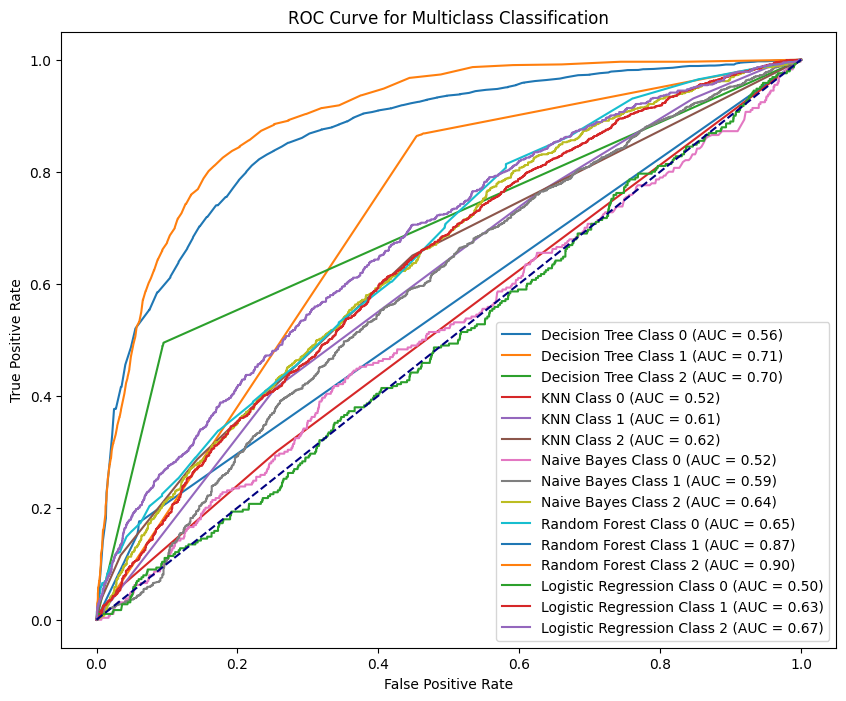

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Function to plot ROC Curve and calculate AUC for multiclass
def plot_roc_curve_multiclass(models, X_test_padded, y_test, n_classes):
    # Binarize the output
    y_test_binarized = label_binarize(y_test, classes=range(n_classes))

    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_padded)
        else:
            y_prob = model.decision_function(X_test_padded)

        # Calculate ROC curve and AUC for each class
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
            auc_score = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} Class {i} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal reference line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiclass Classification')
    plt.legend(loc='lower right')
    plt.show()

# List of models
models = {
    'Decision Tree': decision_tree,
    'KNN': knn_model,
    'Naive Bayes': naive_bayes_model,
    'Random Forest': random_forest_model,
    'Logistic Regression': logistic_regression_model
}

# Number of classes in your dataset
n_classes = len(label_encoder.classes_)

# Plot ROC curves for all models
plot_roc_curve_multiclass(models, X_test_padded, y_test, n_classes)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


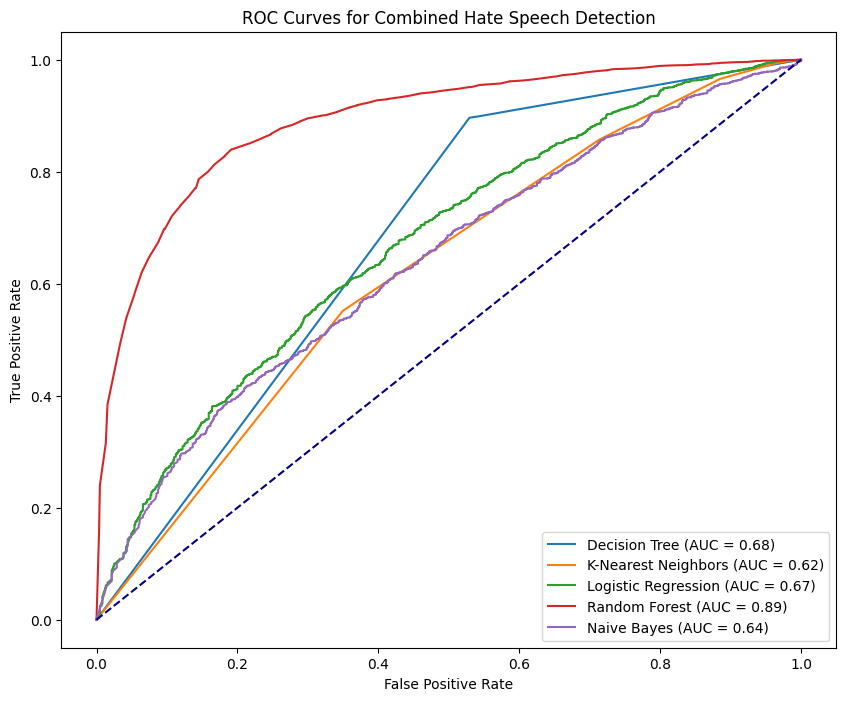

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Convert the original 3-class labels into binary labels (1 for hate/offensive, 0 for neither)
dataset['binary_class'] = dataset['class'].apply(lambda x: 1 if x in [0, 1] else 0)

# Split the new binary-class dataset
X = dataset['processed_tweets']
y = dataset['binary_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding as before
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Define a dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),  # Increased max_iter
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Plot ROC curves
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Fit the model based on model type
    if model_name == 'Naive Bayes':
        model.fit(X_train_padded, y_train)
        y_score = model.predict_proba(X_test_padded)[:, 1]
    else:
        model.fit(X_train_padded, y_train)
        y_score = model.predict_proba(X_test_padded)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Combined Hate Speech Detection')
plt.legend(loc='lower right')
plt.show()



Confusion Matrix

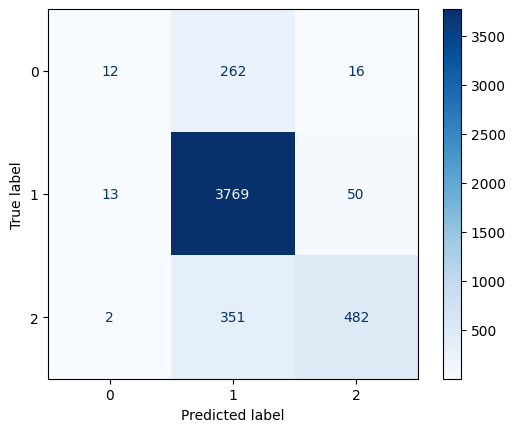

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

# Load the dataset from the CSV file
data = pd.read_csv('HateSpeechData-1.csv')

# Assuming 'text' is the column with the tweet or message content, and 'class' is the target variable
X_text = data['tweet']  # Text feature
y = data['class']      # Target variable

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest in this example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


Area Under Curve (AUC): 0.9141498972684694


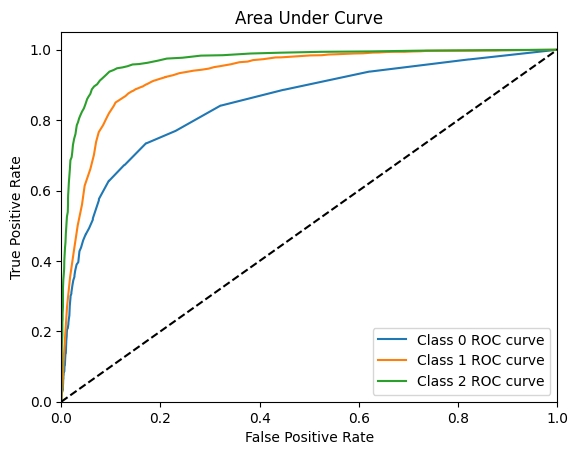

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the dataset
data = pd.read_csv('HateSpeechData-1.csv')  # Adjust the path as necessary

# Assuming 'tweet' is the column with the tweet content, and 'class' is the target variable
X_text = data['tweet']  # Text feature
y = data['class']       # Target variable

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Random Forest in this example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for each class
y_scores = model.predict_proba(X_test)

# Binarize the target variable for calculating multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Calculate AUC for each class separately and then take the average
auc = roc_auc_score(y_test_bin, y_scores, average="macro", multi_class="ovr")
print(f'Area Under Curve (AUC): {auc}')

# Plot ROC curve for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} ROC curve')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()


Area Under Curve (AUC): 0.83


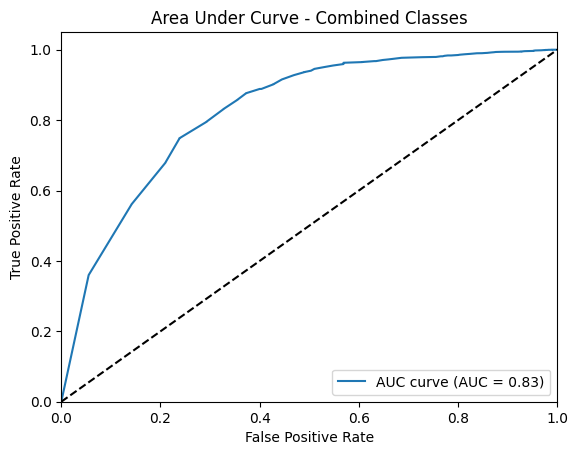

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the dataset
data = pd.read_csv('HateSpeechData-1.csv')  # Adjust the path as necessary

# Assuming 'tweet' is the column with the tweet content, and 'class' is the target variable
X_text = data['tweet']  # Text feature
y = data['class']       # Target variable

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

# Combine classes into one binary class: 1 if hate speech or offensive language, else 0
# Assuming 'class' values:
# 0 - neither, 1 - offensive_language, 2 - hate_speech
y_combined = np.where(y.isin([1, 2]), 1, 0)  # Combine offensive_language and hate_speech into one class (1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Train a classifier (Random Forest in this example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get predicted probabilities for the combined class
y_scores = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (hate speech/offensive)

# Calculate AUC for the combined class
auc_score = roc_auc_score(y_test, y_scores)
print(f'Area Under Curve (AUC): {auc_score:.2f}')

# Plot ROC curve for combined classes
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve - Combined Classes')
plt.legend(loc='lower right')
plt.show()

CNN Model


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Tokenization and Padding
X = dataset['processed_tweets']
y = dataset['binary_class']  # Using the binary class from previous preprocessing

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Determine the max length of sequences
max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

embedding_dim = 100  # Size of the embedding vector

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predictions and Classification Report
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8819 - loss: 0.2855 - val_accuracy: 0.9617 - val_loss: 0.1032
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9723 - loss: 0.0851 - val_accuracy: 0.9531 - val_loss: 0.1144
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9856 - loss: 0.0478 - val_accuracy: 0.9513 - val_loss: 0.1374
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9922 - loss: 0.0264 - val_accuracy: 0.9476 - val_loss: 0.1690
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9950 - loss: 0.0163 - val_accuracy: 0.9438 - val_loss: 0.2160
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9373 - loss: 0.2792
Test Accuracy: 93.63%
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       835
           1       0.96      0.96      0.96      4122

    accuracy                           0

ANN Model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Preprocess and split the data as before
X = dataset['processed_tweets']
y = dataset['binary_class']  # Using the binary class from previous preprocessing

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Determine max length for padding
max_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

embedding_dim = 100  # Size of the embedding vector

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length))
model.add(Flatten())  # Flatten the 2D matrix from embedding into a 1D vector
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Predictions and Classification Report
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8594 - loss: 0.3374 - val_accuracy: 0.9516 - val_loss: 0.1239
Epoch 2/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9770 - loss: 0.0768 - val_accuracy: 0.9478 - val_loss: 0.1362
Epoch 3/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9927 - loss: 0.0252 - val_accuracy: 0.9405 - val_loss: 0.1776
Epoch 4/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9961 - loss: 0.0125 - val_accuracy: 0.9392 - val_loss: 0.2477
Epoch 5/5
496/496 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.9400 - val_loss: 0.2642
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9300 - loss: 0.3451
Test Accuracy: 93.00%
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       835
           1       0.95      0.96      0.96      4122

    accuracy                           0

In [ ]:
import numpy as np

# Define the parity-check matrix H
H = np.array([
    [1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1],
    [0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1],
    [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2]
])

# Vector of ternary symbols x
x = np.array([2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0])

# Calculate H * x in F3
Hx = np.dot(H, x) % 3
Hx


array([1, 1, 2])